# Sea Level Predictor

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

%matplotlib inline

### Import dataframe

In [2]:
df = pd.read_csv(r'../data/epa-sea-level.csv')

### Scatterplot

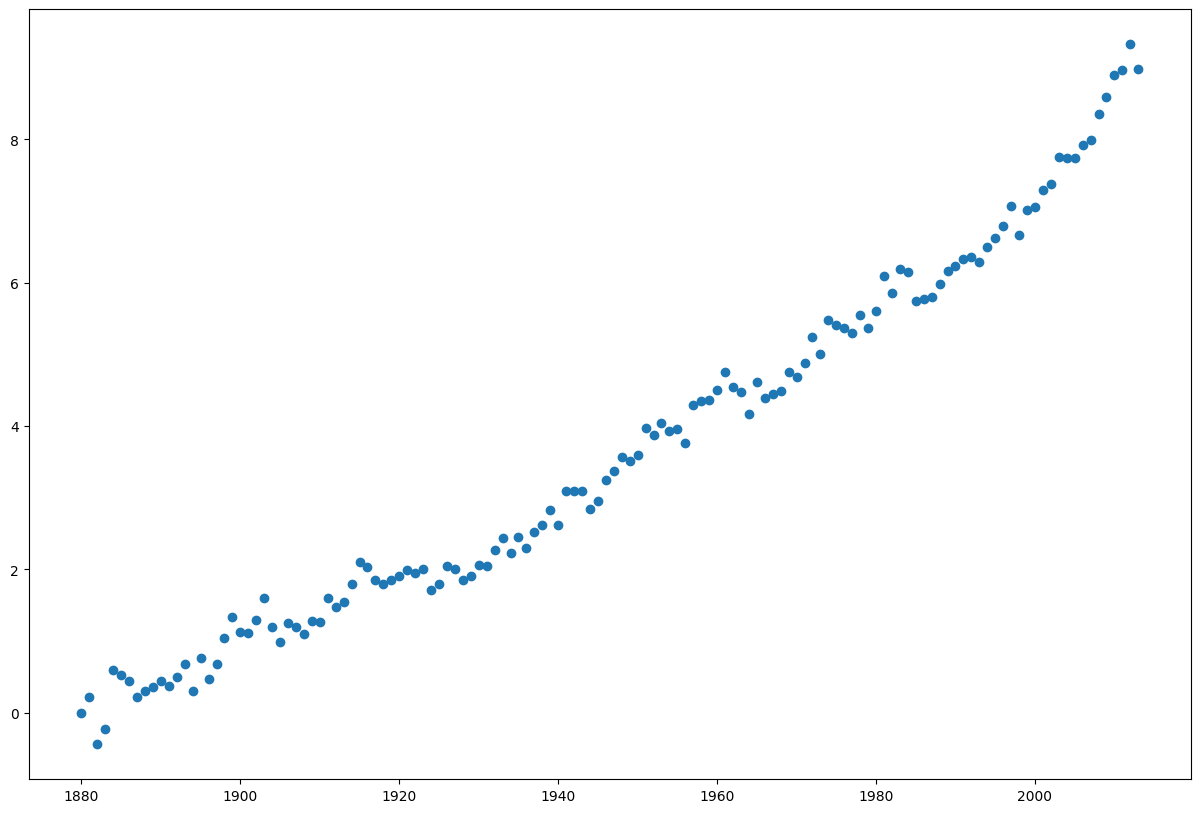

In [52]:
f0, ax0 = plt.subplots(figsize = (15, 10))
_ = ax0.scatter(x = df['Year'], y = df['CSIRO Adjusted Sea Level'])

### Linear regression and prediction based on 1880-2013 data

In [53]:
l1 = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

In [54]:
# Predicted sea Level when Year = 2050
l1.intercept + l1.slope * 2050

10.175455257136548

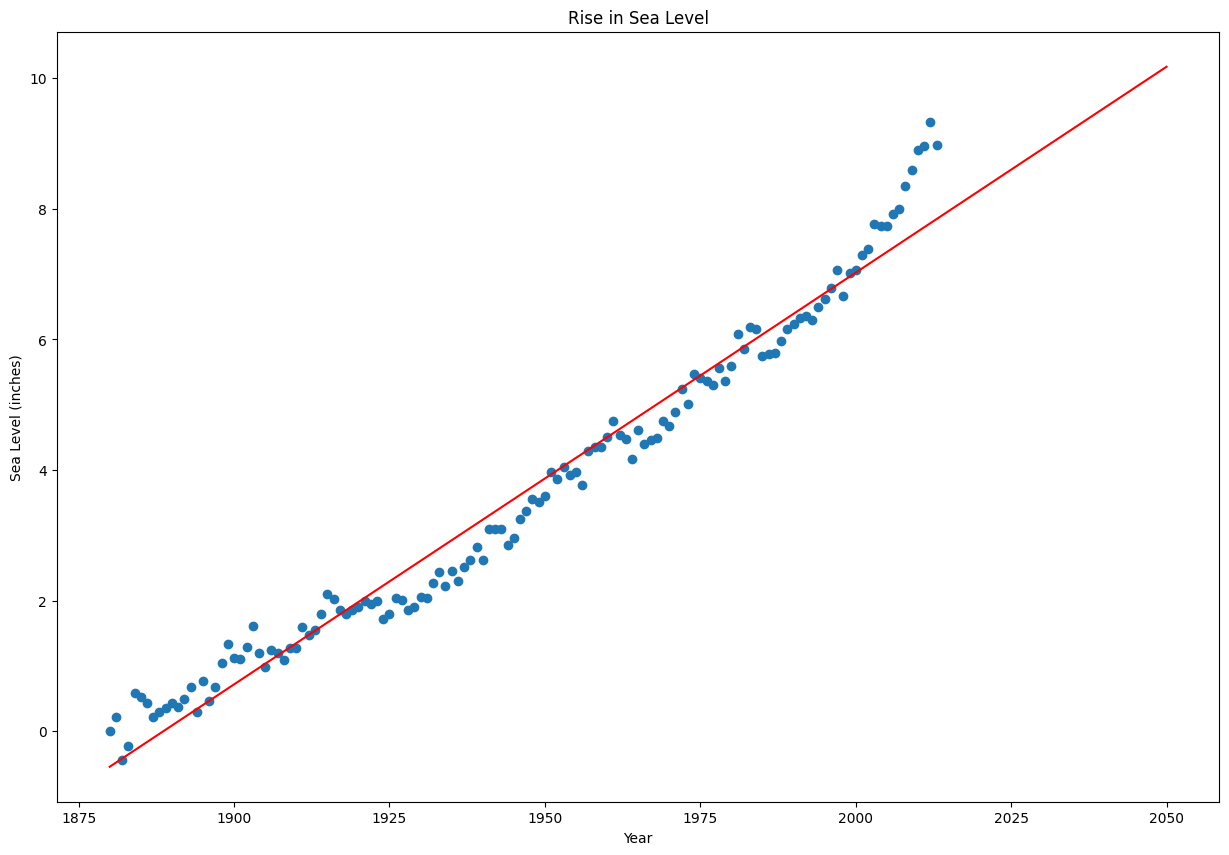

In [55]:
t1 = pd.Series(range(1880, 2050 + 1))

f1, ax1 = plt.subplots(figsize = (15, 10))
ax1.scatter(x = df['Year'], y = df['CSIRO Adjusted Sea Level'])

# Model: Sea Level = b0 + b1 * Year
ax1.plot(t1, l1.intercept + l1.slope * t1, 'r', label = '1st fitted line')
_ = ax1.set(xlabel = 'Year', ylabel= 'Sea Level (inches)', title = 'Rise in Sea Level')

### Linear regression and prediction based on 2000-2013 data

In [57]:
df_adj = df.loc[df["Year"] >= 2000]

l2 = linregress(df_adj['Year'], df_adj['CSIRO Adjusted Sea Level'])

In [58]:
# Predicted sea Level when Year = 2050
l2.intercept + l2.slope * 2050

15.382443524364874

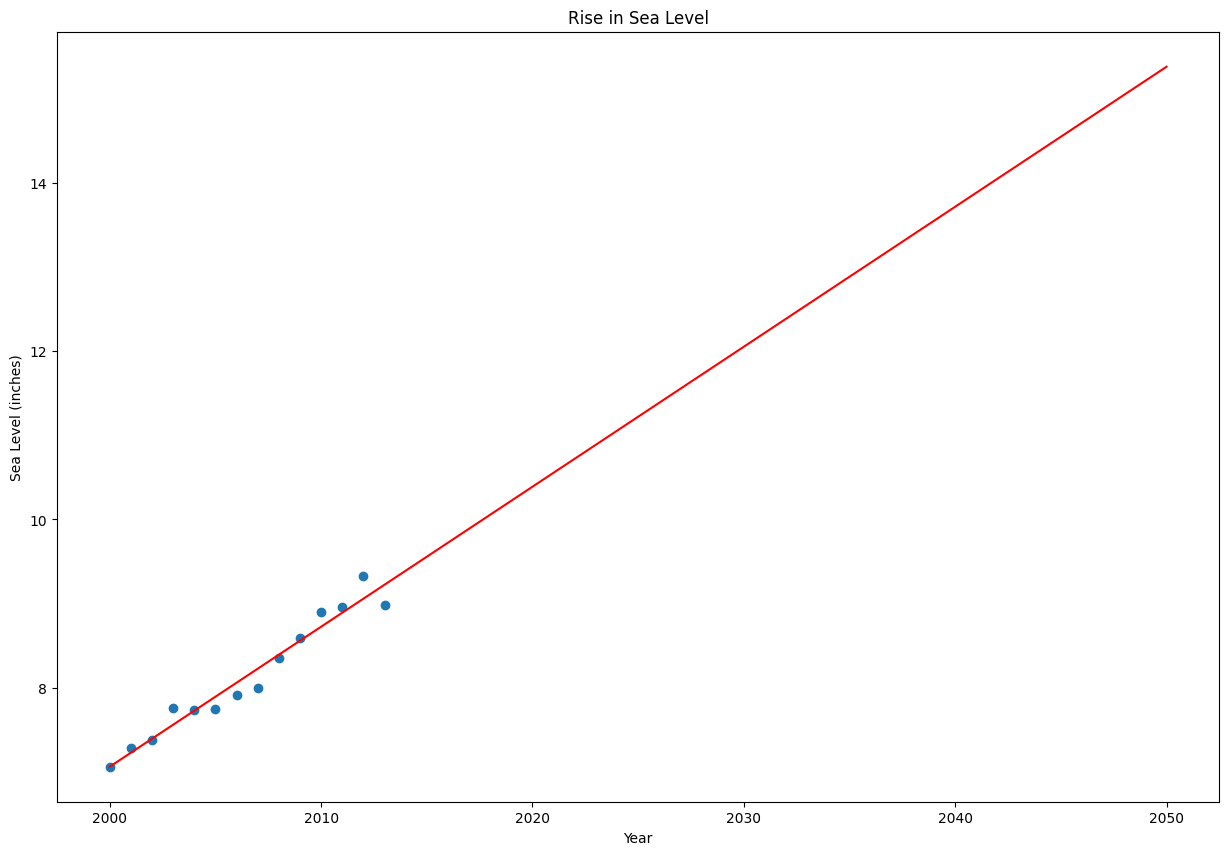

In [59]:
t2 = pd.Series(range(2000, 2050 + 1))

f2, ax2 = plt.subplots(figsize = (15, 10))
ax2.scatter(x = df_adj['Year'], y = df_adj['CSIRO Adjusted Sea Level'])

ax2.plot(t2, l2.intercept + l2.slope * t2, 'r', label = '2nd fitted line')
_ = ax2.set(xlabel = 'Year', ylabel= 'Sea Level (inches)', title = 'Rise in Sea Level')

### Combined plot

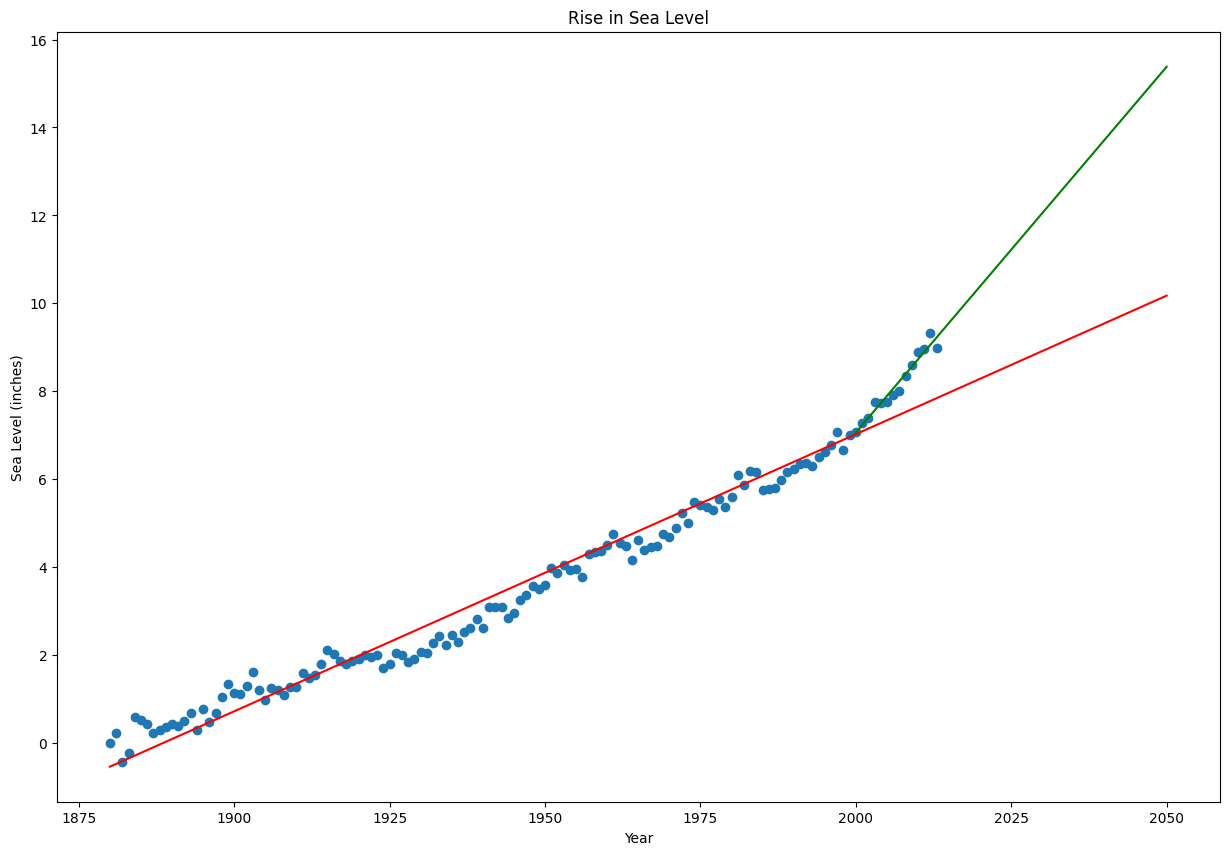

In [62]:
f, ax = plt.subplots(figsize = (15, 10))

ax.scatter(x = df['Year'], y = df['CSIRO Adjusted Sea Level'])
ax.plot(t1, l1.intercept + l1.slope * t1, 'r', label = '1st fitted line')
ax.plot(t2, l2.intercept + l2.slope * t2, 'g', label = '2nd fitted line')
_ = ax.set(xlabel = 'Year', ylabel= 'Sea Level (inches)', title = 'Rise in Sea Level')

### Save plot

In [66]:
f.savefig('sea_level_plot.png')